In [11]:
# Dependencies
from splinter import Browser
from bs4 import BeautifulSoup as bs
from webdriver_manager.chrome import ChromeDriverManager

executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)

In [12]:
# Other dependencies
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

# style from https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
style.use('fivethirtyeight')

In [17]:
# using pandas to scrape html
mars_df = pd.read_html(url)
mars_df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [18]:
# convert data then check data types:
mars_df = pd.DataFrame(mars_df[0])
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [23]:
# convert data that should change:
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [24]:
# Challenge questions:
print("Question: How many months exist on mars?")
print("")
print(f"Answer: There are {mars_df['month'].max()} months on Mars.")
print("")
print("Question: How many Martian (and not Earth) days worth of data exist in the scraped dataset?")
print("")
print(f"Answer: There are {mars_df['sol'].nunique()} Martian days worth of data in this dataset.")

Question: How many months exist on mars?

Answer: There are 12 months on Mars.

Question: How many Martian (and not Earth) days worth of data exist in the scraped dataset?

Answer: There are 1867 Martian days worth of data in this dataset.


Question: What are the coldest and the warmest months on Mars (at the location of Curiosity)?

The coldest month on Mars is month 3 while the warmest month on Mars is month 8 according to the chart.


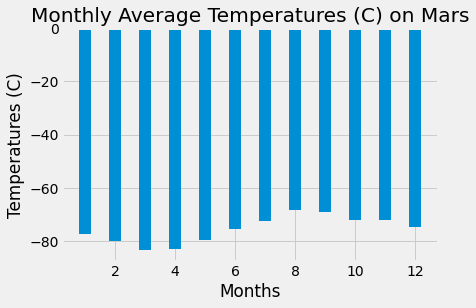

In [40]:
# Averaging the minimum daily temperature of all the months. Plotting the results as a bar chart.
month_df = mars_df.groupby("month")

plt.bar(month_df["month"].mean(),month_df["min_temp"].mean(), width = 0.4)
plt.title("Monthly Average Temperatures (C) on Mars")
plt.ylabel("Temperatures (C)")
plt.xlabel("Months") 

print("Question: What are the coldest and the warmest months on Mars (at the location of Curiosity)?")
print("")
print("The coldest month on Mars is month 3 while the warmest month on Mars is month 8 according to the chart.")

Question: Which months have the lowest and the highest atmospheric pressure on Mars?

Answer: Month 6 has the lowest atmospheric pressure while month 9 appears to have the highest.


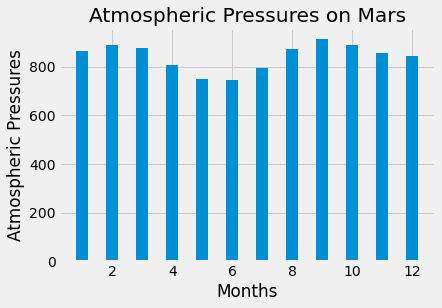

In [41]:
# Averaging the daily atmospheric pressure of all the months. Plotting the results as a bar chart.
plt.bar(month_df["month"].mean(),month_df["pressure"].mean(), width = 0.4)
plt.title("Atmospheric Pressures on Mars")
plt.ylabel("Atmospheric Pressures")
plt.xlabel("Months")

print("Question: Which months have the lowest and the highest atmospheric pressure on Mars?")
print("")
print("Answer: Month 6 has the lowest atmospheric pressure while month 9 appears to have the highest.")

Question: About how many terrestrial (Earth) days exist in a Martian year?

That is, in the time that Mars circles the Sun once, how many days elapse on Earth?

Answer: Using peak in temperaturefor reference, two Earth years is almost equal to every one Martian year.
So, one Martian year is equal to about 730 Earth days, give or take a month or two.


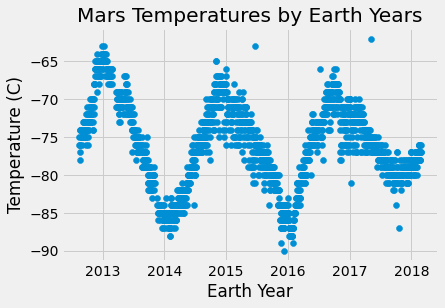

In [49]:
# Visually estimate about how many terrestrial (Earth) days exist in a Martian year by plotting the -
# - daily minimum temperature.
date_df = mars_df.groupby("terrestrial_date")

plt.scatter(date_df["terrestrial_date"].mean(),date_df["min_temp"].mean())
plt.title("Mars Temperatures by Earth Years")
plt.ylabel("Temperature (C)")
plt.xlabel("Earth Year")

print("Question: About how many terrestrial (Earth) days exist in a Martian year?")
print("")
print("That is, in the time that Mars circles the Sun once, how many days elapse on Earth?")
print("")
print("Answer: Using peak in temperaturefor reference, two Earth years is almost equal to every one Martian year.")
print("So, one Martian year is equal to about 730 Earth days, give or take a month or two.")

# Quick search indicates the actual number is 687 days.


In [50]:
# Export DataFrame to CSV:
mars_data = "mars_data.csv"
mars_df.to_csv(mars_data)